## Final Project Submission

Please fill out:
* By: Namita Rana, Jose Harper, and Jeremias Campos 
* Blog post URL: https://github.com/namitarana1/Phase2_Test/tree/main


## Introduction
King County is home to the largest and fifth largest city in Washington State, namely Seattle and Bellevue, which in conjunction with the third largest city Tacoma forms the Seattle metropolitan area.
#### We were hired to predict the best attributes that influence housing prices in Kings Country, Washington. We must inform our stakeholders which features are the best predictors of home price in todays housing market. 

## Business Understanding
Stakeholder: Seattle Bank 

Business Problem: Banks give home loans based on the ability of the buyer to afford a home at a certain price point. We want to make sure that the value of the home is eqaul to or less than the mortage amount that will be given to the buyer. 

Subproblem: Houses have many features that help in determining housing prices so we need to narrow the criteria by coming up with a regression model that helps predict the value in Kings County.


### Background
We have provided the names and descriptions of the columns in the provided King County dataset:

* id - unique ID for a house
* date - Date day house was sold
* price - Price is prediction target
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - square footage of the home
* sqft_lot - square footage of the lot
* floors - Total floors (levels) in house
* waterfront - Whether house has a view to a waterfront
* view - Number of times house has been viewed
* condition - How good the condition is (overall)
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house (apart from basement)
* sqft_basement - square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - zip code in which house is located
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Exploratory Data Analysis

The following notebook presents the steps in predicting house pries based on multiple features using regression analysis.We will apply the techniques of exploratory data analysis (EDA) to familiarize ourselves with the dataset.

By performing an EDA, we are able to explore the relationships, or lack thereof, between the features and the target and amongst the feature variables themselve. We are better equipped through this process to identify features for analysis and filter out those without any correlation with our target variable. This process is also integral to identifying outliers, missing values, or anomalous values due to human error due to data visualization.

In [1]:
#import the libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
import plotly.express as px

In [2]:
# read CSV file
df=pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
df.median()

id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.910000e+03
sqft_lot         7.618000e+03
floors           1.500000e+00
sqft_above       1.560000e+03
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222310e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64

In [6]:
df.drop(columns=['waterfront','yr_renovated','view','lat','long']) 

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  condition          grade  sqft_above sqft_basement  \
0          5650     1.0    Average      7 Average        1180           0.0   
1          7242     2.0    Average      7 Average        2170         400.0   
2         10000     1.0    Average  6 Low Average         770           0.0   
3          5000     1.0  Very Good      7 Average        1050         910.0   
4          8080     1.0    Average         8 Good        1680           0.0   
...         ...     ...        ...            ...         ...           ...   
21592      1131     3.0    Average         8 Good        1530           0.0   
21593      5813     2.0    Average         8 Good        2310           0.0   
21594      1350     2.0    Average      7 Average        1020           0.0   
21595      2388     2.0    Average         8 Good        1600           0.0   
21596      1076     2.0    Average      7 Average        1020           0.0   

       yr_built  zipcode  sqft_living15  sqft_lot15  
0          1955    98178           1340        5650  
1          1951    98125           1690        7639  
2          1933    98028           2720        8062  
3          1965    98136           1360        5000  
4          1987    98074           1800        7503  
...         ...      ...            ...         ...  
21592      2009    98103           1530        1509  
21593      2014    98146           1830        7200  
21594      2009    98144           1020        2007  
21595      2004    98027           1410        1287  
21596      2008    98144           1020        1357  

[21597 rows x 16 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
#Counting the bedrooms.
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [10]:
#Counting sqft_living
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

# Data Exploration
We are exploring the data and check for null values, get it cleaned up for preparation for data analysis.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

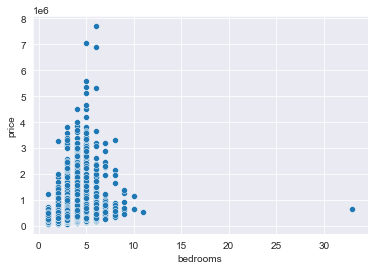

In [11]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])

In [12]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
#Checking for obvious outliers:
#bedrooms has an entry for 33 max bedrooms but the mean is 3.37. 
#there's' only 1 house that has 33 bedrooms so we'll take a look at that specific row
df.loc[df['bedrooms'] > 12]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors waterfront  view  ...      grade sqft_above  \
15856      6000     1.0         NO  NONE  ...  7 Average       1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15856          580.0     1947           0.0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [14]:
#since the above bedrooms entry with 33 bedrooms with 1.75 seems incorrect, we are going to update it to no of bedrooms = 3
df.loc[df['bedrooms'] > 12, 'bedrooms'] = 3

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

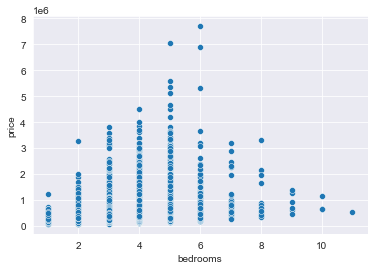

In [15]:
sns.scatterplot(x = df['bedrooms'], y=df['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

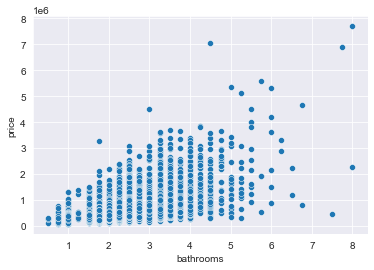

In [16]:
#Scatterplot for bathrooms vs price
sns.scatterplot(x=df['bathrooms'], y=df['price'])


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

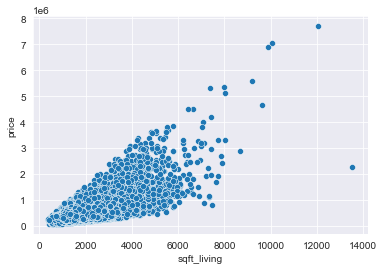

In [17]:
#Scatterplot for sqft_living and price
sns.scatterplot(x=df['sqft_living'], y=df['price'])


In [18]:
df['sqft_living'].max()

13540

In [19]:
df.loc[df['sqft_living'] == 13540]

id      date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038  5/5/2014  2280000.0         7        8.0        13540   

       sqft_lot  floors waterfront       view  ...      grade sqft_above  \
12764    307752     3.0         NO  EXCELLENT  ...  12 Luxury       9410   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12764         4130.0     1999           0.0    98053  47.6675 -121.986   

       sqft_living15  sqft_lot15  
12764           4850      217800  

[1 rows x 21 columns]

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

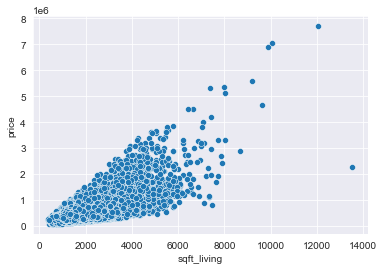

In [20]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])

### Target Variable:
Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [21]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [22]:
price_median = df['price'].median()
price_median

450000.0

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. When this happens, regressing the log of price usually provides a better fitting, compared to the original price;
The maximum house price is listed as 7,700.000 and the minimum price is 78,000.

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


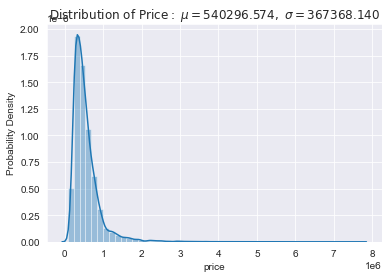

In [23]:
mu = df['price'].mean()
sigma = df['price'].std()
plt.xlabel('House Price')
plt.ylabel('Probability Density')

plt.title(r'$\mathrm{Distribution\ of\ Price:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
sns.distplot(df['price']);

As we can see, there is a noticeable right skew. This suggests that, on the more expensive side of houses, there's a large variety in the prices of houses.



In [24]:
#Dropping the columns that will not be useful.
df.drop(columns=['id'], inplace=True)

df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

  waterfront  view  condition          grade  sqft_above sqft_basement  \
0        NaN  NONE    Average      7 Average        1180           0.0   
1         NO  NONE    Average      7 Average        2170         400.0   
2         NO  NONE    Average  6 Low Average         770           0.0   
3         NO  NONE  Very Good      7 Average        1050         910.0   
4         NO  NONE    Average         8 Good        1680           0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

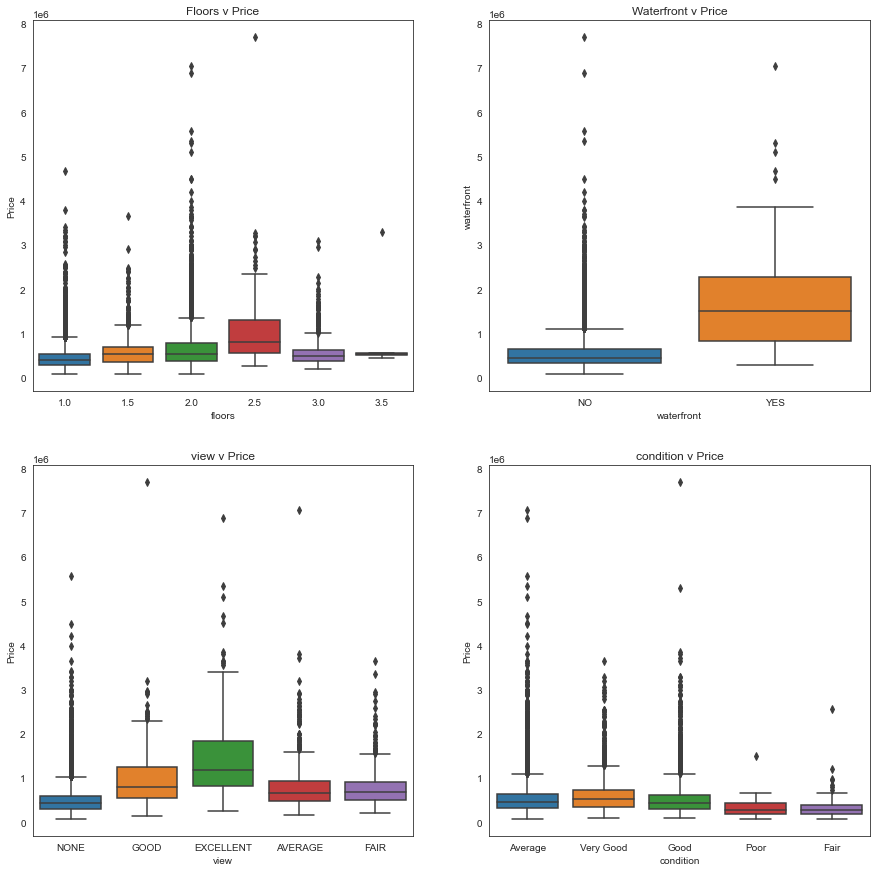

In [25]:
# Suplots of categorical features v price

sns.set_style('white')
f, axes = plt.subplots(2,2, figsize = (15,15))


# Plot [0,0]
sns.boxplot(data = df, x = 'floors', y = 'price', ax = axes[0,0])
axes[0,0].set_xlabel('floors')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Floors v Price')

# Plot [0,1]
sns.boxplot(x = 'waterfront', y = 'price', data = df, ax = axes[0,1])
axes[0,1].set_xlabel('waterfront')
axes[0,1].set_ylabel('waterfront')
axes[0,1].set_title('Waterfront v Price')

# Plot [1,0]
sns.boxplot(x = 'view', y = 'price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('view')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('view v Price')

# Plot [1,1]
sns.boxplot(x = 'condition', y = 'price', data = df, ax = axes[1,1])
axes[1,1].set_xlabel('condition')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('condition v Price');


# Data cleaning:

#### As data scientists, we undergo the different facets of the data cleaning process to ensure that our "dirty" data does not lead to any false conclusions. To ensure the validity, completeness, and consistency of the data, we make any necessary type conversions, remove any duplicate values and outliers, impute in any missing or anomalous values, perform any scaling or transformations to reduce skewness.

Let's have a first look of the main statistics of the variable we are trying to predict: house prices.

In [26]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

There is some informartion we can interpret here:
The mean value of homes of 540,296 is greater than the median of 450,000. This is an indication that the response variable is positively skewed. When this happens, regressing the log of price usually provides a better fitting, compared to the original price;
The maximum house price is listed as 7,700.000 and the minimum price is 78,000.

In [27]:
#Look at the view column:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [28]:
#We will check the view column to see how many null values it holds:
df['view'].isna().sum()

63

In [29]:
#fill the null values with None:
df['view'] = df['view'].fillna('NONE')
df['view'].isna().sum()

0

Since view is a categorical data we are going to convert it into numerical data:

In [30]:
# we are going to map our caterogical values to numerical values:
view_numerical = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_numerical, inplace=True)

In [31]:
# let's look at where the houses with most excellent views are:
fig_view = px.scatter_mapbox(df[df['view']== 5],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=9)
#plt.title('View')
fig_view.update_layout(mapbox_style='open-street-map')

plt.savefig('View.pdf')

fig_view.show()

<Figure size 432x288 with 0 Axes>

Checking for grade: This is also a categorical data we are going to replace it with numerical values.

In [32]:
#checking for the values in grade columns:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [33]:
#mapping these to numerical values:
grade_numerical = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13 }
df['grade'].replace(grade_numerical,inplace = True)

In [34]:
# We are goiing to check for condition column
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [35]:
#mapping the categorical values to numerical valeus:
condition_numerical = {'Poor': 1,
             'Fair': 2,
             'Average': 3,
             'Good': 4,
             'Very Good': 5}
df['condition'].replace(condition_numerical,inplace = True)

In [36]:
#Lets have a look at the waterfront column:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [37]:
df['waterfront'].isna().sum()

2376

In [38]:
#let's fill the waterfront missing values:
df['waterfront'] = df['waterfront'].fillna('NONE')
df['waterfront'].isna().sum()

0

In [39]:
#We will map the values of NO,Yes to numerical values:
waterfront_numerical = {'NONE': 0,
                        'YES': 1,
                         'NO':2,
                        }
df['waterfront'].replace(waterfront_numerical,inplace = True)

In [40]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0           0     1          3      7        1180           0.0      1955   
1           2     1          3      7        2170         400.0      1951   
2           2     1          3      6         770           0.0      1933   
3           2     1          5      7        1050         910.0      1965   
4           2     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [41]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.371811      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.904096      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      1.773209      1.233181      3.409825      7.657915   
std        0.539683      0.628813      0.764673      0.650546      1.173200   
min        1.000000      0.000000      1.000000      1.000000      3.000000   
25%        1.000000      2.000000      1.000000      3.000000      7.000000   
50%        1.500000      2.000000      1.000000      3.000000      7.000000   
75%        2.000000      2.000000      1.000000      4.000000      8.000000   
max        3.500000      2.000000      5.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

## Data Analysis:

We will start with checkin where the houses with mean prices lie using open-street-map:
Mean of house prices is around 540,000.

In [42]:
#creating a scatter plot to see where houses with median prices lie
fig = px.scatter_mapbox(df[df['price'] < 600000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')
plt.savefig('Mean_house_locations.pdf')
fig.show()

<Figure size 432x288 with 0 Axes>

The above figure shows the areas that contain house's with mean prices of around 540,000 which seems to be mostly conecntrated around Redmond,Sammamish,Issaquah.

In [43]:
#creating a scatter plot to see where does the house with median sqft lie.
fig = px.scatter_mapbox(df[df['sqft_lot'] <= 1910 ],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=10)
fig.update_layout(mapbox_style='open-street-map')
plt.savefig('Sqft_lot.pdf')
fig.show()

<Figure size 432x288 with 0 Axes>

We will take a look at the scatter plots of each variable compared to price to see if there are any linear trends.
We look at continuous and categorical variables separately.

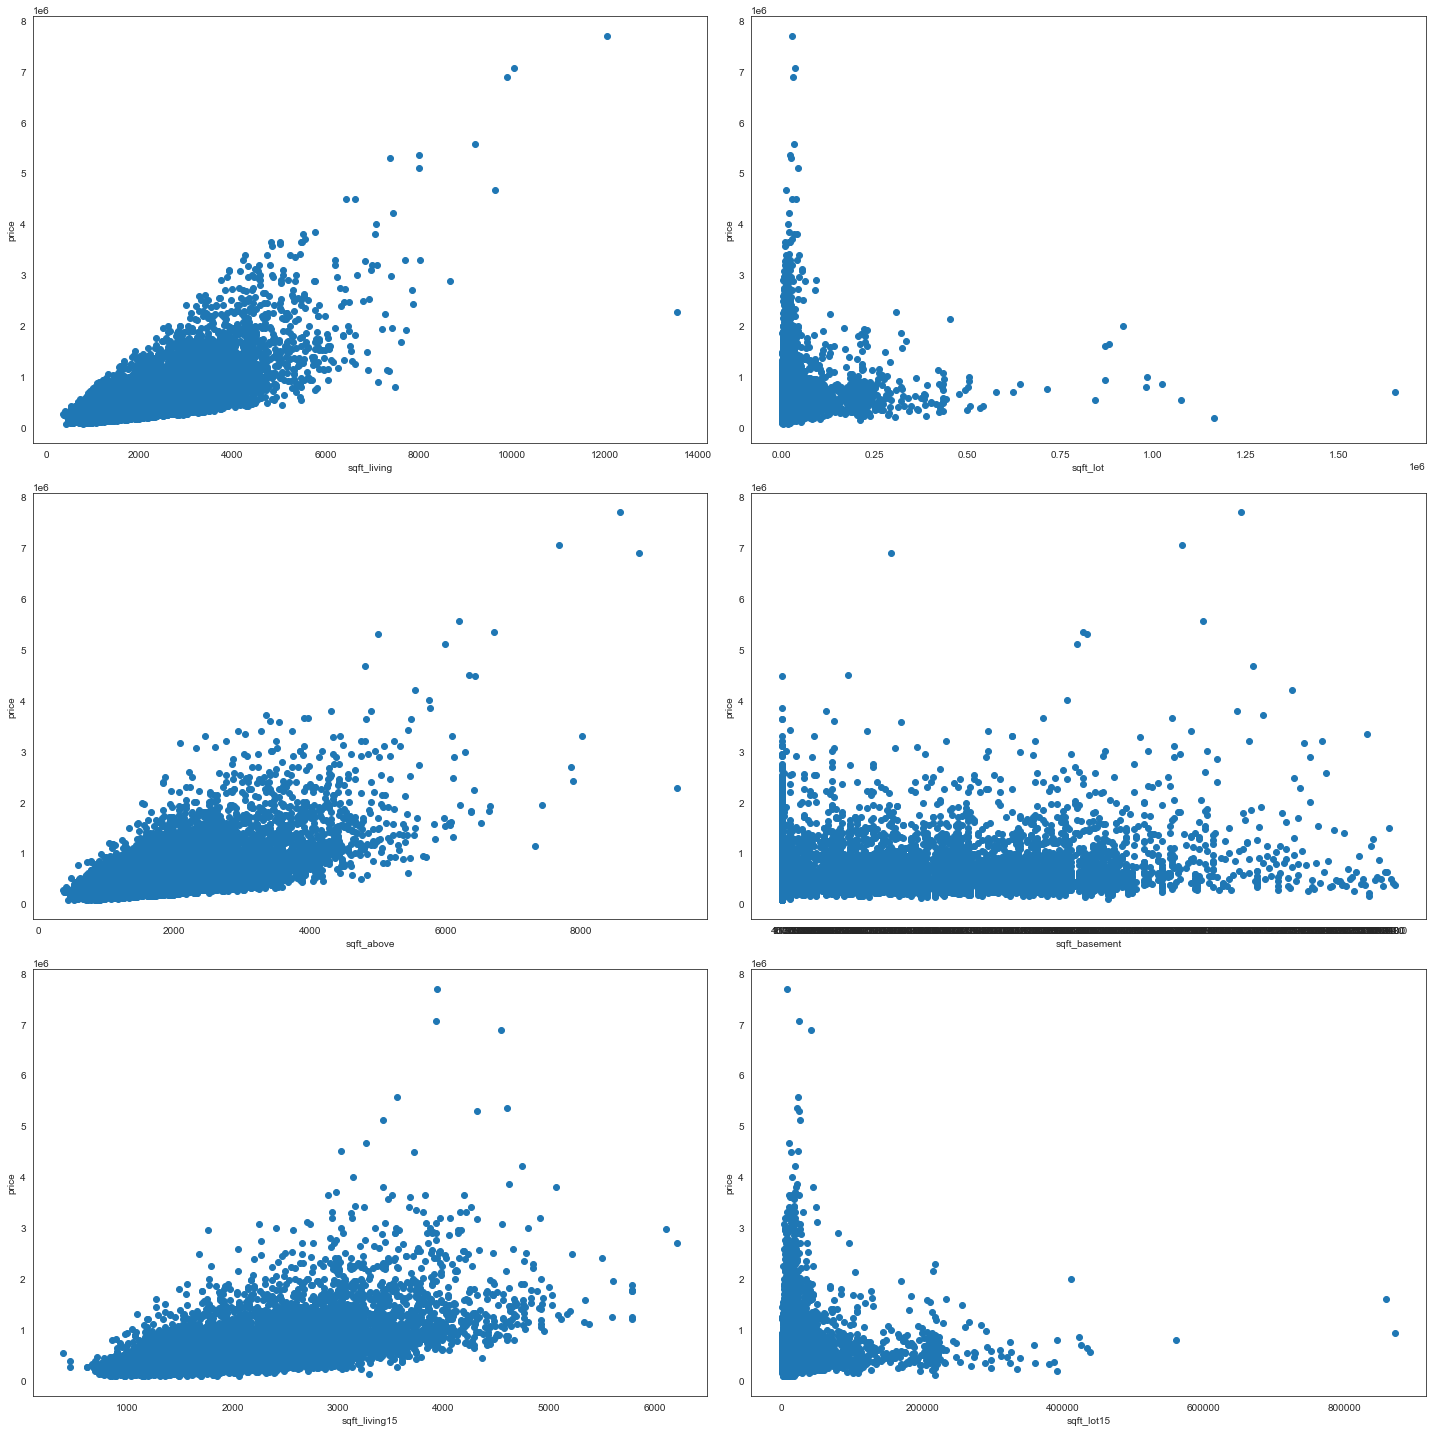

In [44]:
#Let's look at continous variables first:
cont_columns = [ 'sqft_living', 'sqft_lot',
               'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
plt.figure(figsize=(20,20))
for i in range(0, 6):
    plt.subplot(3, 2, i+1)
    plt.scatter(df[cont_columns[i]], df['price'])
    plt.xlabel(cont_columns[i])
    plt.ylabel('price')
plt.savefig('Continous_variables_linearTrends.pdf')    
plt.tight_layout()

Looking at the scatter plots we can observe that sqft_living has a positive correlation with Price(given few outliers). As thes size of house increases it tends to cost more.
Lot sizes seem to be negatively correlated with housing prices.
Suprisingly, sqft_basement do not seem to have a strong correlation with price.
Sqft_above has a high positive coorelation with price indicating that people prefer houses with more living space than basement.

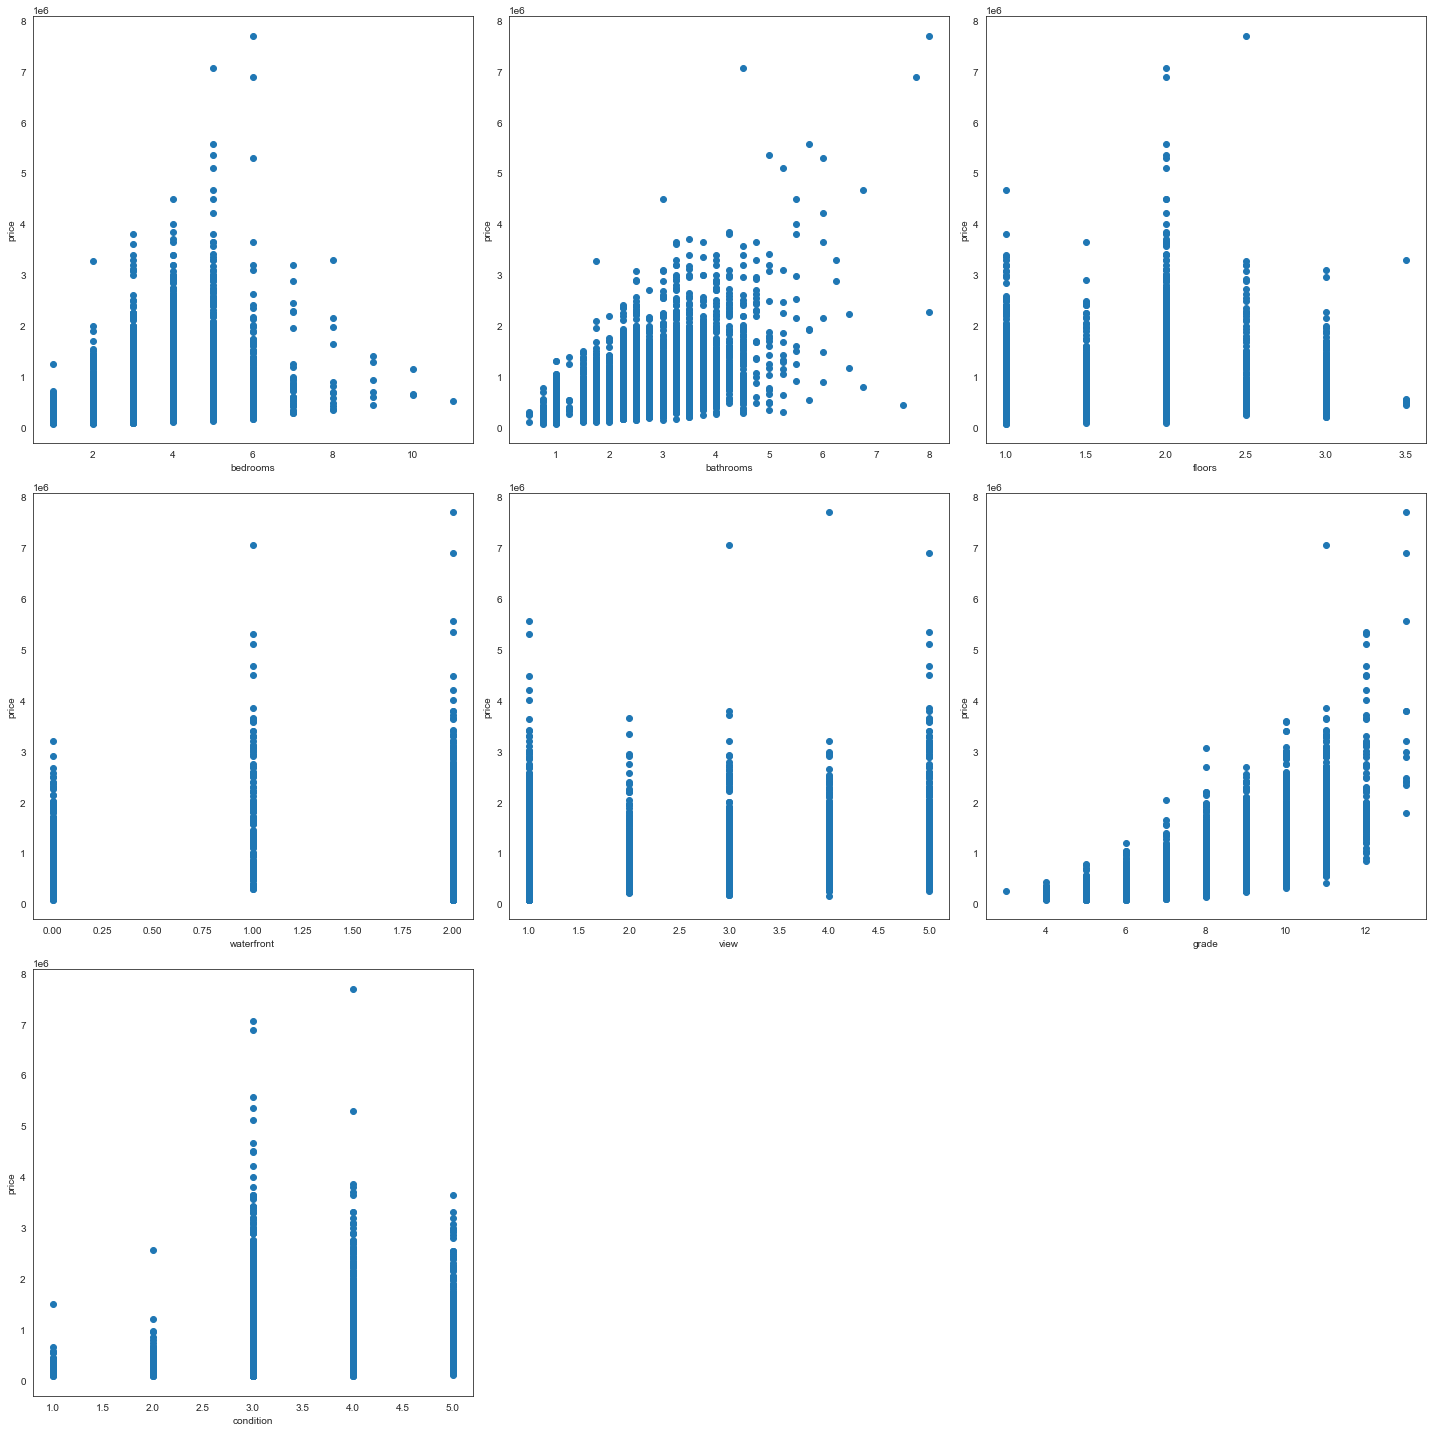

In [45]:
#Lets have a look at catergorical data columns:
categorical_columns =  [ 'bedrooms', 'bathrooms',
               'floors', 'waterfront','view', 'grade','condition']
plt.figure(figsize=(20,20))
for i in range(0, 7):
    plt.subplot(3, 3, i+1)
    plt.scatter(df[categorical_columns[i]], df['price'])
    plt.xlabel(categorical_columns[i])
    plt.ylabel('price')
plt.savefig('Categorical_variables_linearTrends.pdf')    
plt.tight_layout()

This categorical scatter plot shows us the positive coorelation between Bathrooms and grade. 
The number of bedrooms is linear up to 6 bedrooms. 
Also, Condition of a house is linear till 3 and then it starts to decrease.
The linearity for the number of bathrooms becomes less consistent for houses with more than 5 bathrooms.

In [46]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0           0     1          3      7        1180           0.0      1955   
1           2     1          3      7        2170         400.0      1951   
2           2     1          3      6         770           0.0      1933   
3           2     1          5      7        1050         910.0      1965   
4           2     1          3      8        1680           0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

### Lastly, to aid in data analysis, let's "tidy up" this Dataframe by following the Tidy Data standard. To do this, we must ensure that each variable is stored in its own column.Let's split and replace the date column into separate columns year, month, and day.

In [47]:
#Tidy up the date/yr/month into separate columns
df["date"] = pd.to_datetime(df.date)
df["year"] = df.date.dt.year
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day
df["day_of_week"] = df.date.dt.day_name()
df = df.drop("date", axis=1)
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  yr_renovated zipcode      lat  \
0               0     1          3      7  ...           0.0   98178  47.5112   
1               2     1          3      7  ...        1991.0   98125  47.7210   
2               2     1          3      6  ...           NaN   98028  47.7379   
3               2     1          5      7  ...           0.0   98136  47.5208   
4               2     1          3      8  ...           0.0   98074  47.6168   
...           ...   ...        ...    ...  ...           ...     ...      ...   
21592           2     1          3      8  ...           0.0   98103  47.6993   
21593           2     1          3      8  ...           0.0   98146  47.5107   
21594           2     1          3      7  ...           0.0   98144  47.5944   
21595           0     1          3      8  ...           0.0   98027  47.5345   
21596           2     1          3      7  ...           0.0   98144  47.5941   

          long  sqft_living15  sqft_lot15  year  month  day  day_of_week  
0     -122.257           1340        5650  2014     10   13       Monday  
1     -122.319           1690        7639  2014     12    9      Tuesday  
2     -122.233           2720        8062  2015      2   25    Wednesday  
3     -122.393           1360        5000  2014     12    9      Tuesday  
4     -122.045           1800        7503  2015      2   18    Wednesday  
...        ...            ...         ...   ...    ...  ...          ...  
21592 -122.346           1530        1509  2014      5   21    Wednesday  
21593 -122.362           1830        7200  2015      2   23       Monday  
21594 -122.299           1020        2007  2014      6   23       Monday  
21595 -122.069           1410        1287  2015      1   16       Friday  
21596 -122.299           1020        1357  2014     10   15    Wednesday  

[21597 rows x 23 columns]

In [48]:
# Creating groups for month and day_of_the_week
month_group = df.groupby(by=["month"])
day_group = df.groupby(by=["day_of_week"])

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



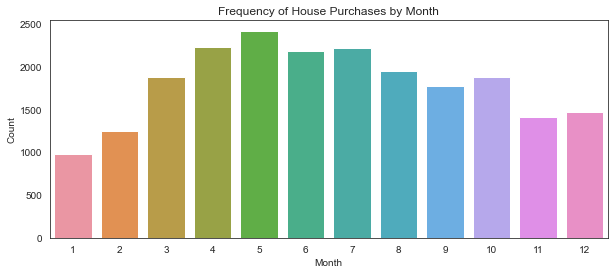

In [49]:
#Plotting a histogram of house purchase by month
plt.figure(figsize=(10,4))
month_freq = month_group.size()
month_freq_plot = sns.barplot(month_freq.index, month_freq.values)
month_freq_plot.set(xlabel="Month", ylabel="Count", title="Frequency of House Purchases by Month")
plt.savefig('Frequency of house purchase by month')
plt.show()

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



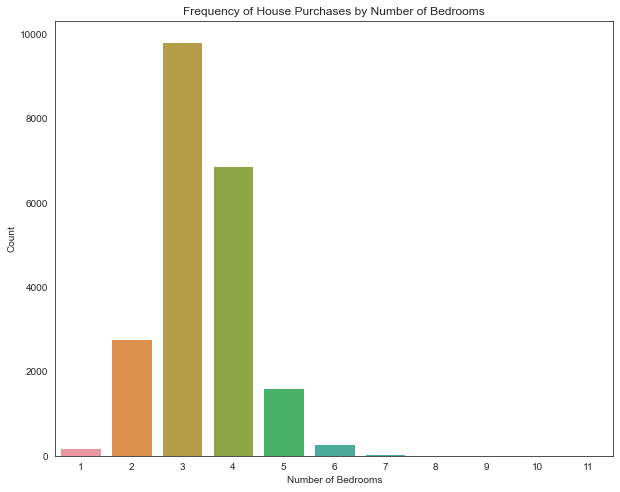

In [50]:
# Plotting a histogram for freqency of house purchsaes by bedrooms.
plt.figure(figsize=(10,8))
bed_group = df.groupby(by=["bedrooms"])
bed_freq = bed_group.size()
bed_freq_plot = sns.barplot(bed_freq.index, bed_freq.values)
bed_freq_plot.set(xlabel="Number of Bedrooms", ylabel="Count", title="Frequency of House Purchases by Number of Bedrooms")
plt.savefig('house_Noofbedrooms')
plt.show()

### Now, that our dataframe is ready we are going to start building our model:

Let's understand Linear Regression:
Linear regression has 5 key assumptions:

* The input variables are independent from one another.
* The true relationship between independent and dependent variables is linear.
* The model error is normally distributed.
* The model errors are homoscedastic (in other orders, variability in output does not change as inputs change).

* We've shown through EDA that we should be safe assuming that our features have a linear relationship with price. What we need to do now is ensure that our features are independent from one another. To verify this, let's create a heatmap to view the relationship between our features.

## Model Building
Before running a regression model with this data, we need to select which variables we believe will be the best predictors. We can eliminate variables by looking at collinearity between variables and choosing to drop one of those variables. We will choose to use a Pearson's correlation coefficient of 0.7 as the initial cutoff value.

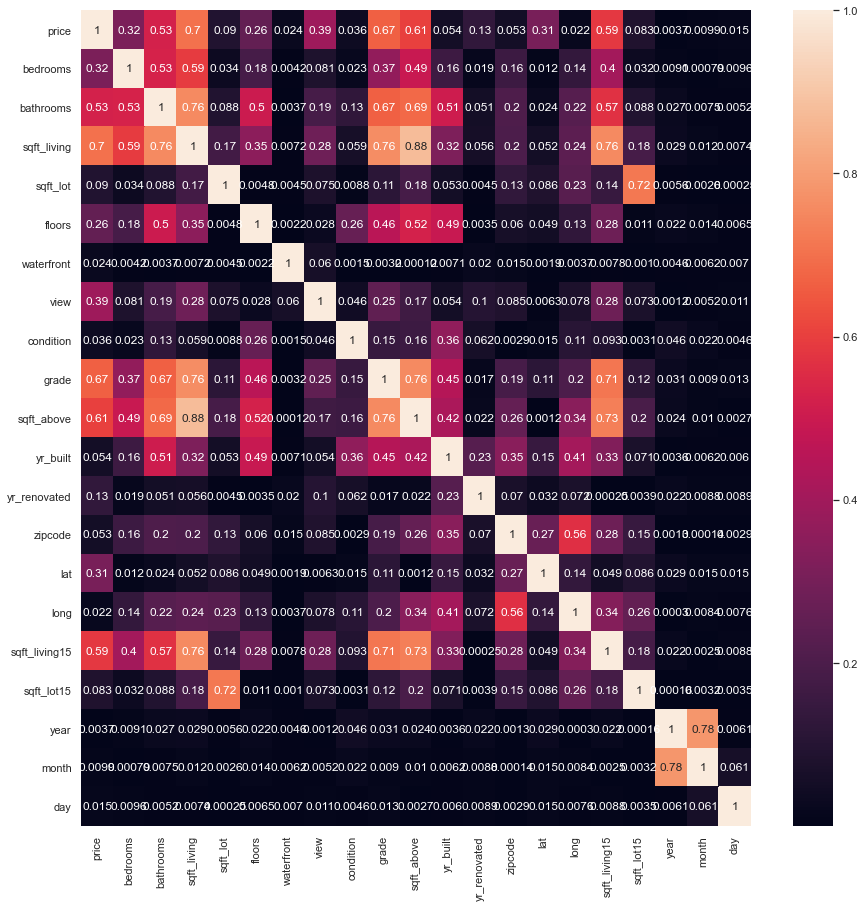

In [51]:
#plotting a heatmap to check for coorelations.
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df.corr().abs(), annot = True)
plt.savefig("Intial_Heatmap")

HeatMap Analysis:
* Sq_ft living, grade are the most high positively correlated to price.
* sqft_above is highly correlated to price.

Our heatmap shows us the Pearson's correlation coefficient between each pair of variables. We also need to be cognizant of multicollinearity between each of our variables.



### Construction of Models:
#### Structure of the  model for baseline for comparisons

Based on our exploratory analysis, we have a good idea of which features might affect the price of a house in King County. We will now focus on developing a linear regression model to predict the price of a house. For this project, we will be fitting our regression line using the most common method of least squares.

Before continuing, let's first prepare the Dataframe for regression. For our base model, we will exclude the id, day_of_week, day, month, year, lat, long, or zipcode columns. These variables do not provide intrinsic value in the prediction of prices. We also exclude yr_renovated as there are only 910 houses that were renovated between 2014-2015. Similarly, we exclude waterfront as there are only 163 waterfront houses in the Dataframe.

For our models we will looking at respective features:
## Model1:
##### Selected features:
* sqft_living, 
* bedrooms
* floors
* view'

## Model2:
##### Selected features:
* sqft_living, 
* bedrooms
* floors
* view
* grade
* yr_built
* waterfront
* condition

## Test/Train Split: Model 1

In [52]:
#Selecting the features we are interested in:
df_model1 = df.drop(['sqft_lot','waterfront', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_basement','yr_renovated', 'zipcode', 'lat','long','sqft_living15','sqft_lot15'],axis=1)

In [53]:
df_model1

price  bedrooms  bathrooms  sqft_living  floors  view  year  month  \
0      221900.0         3       1.00         1180     1.0     1  2014     10   
1      538000.0         3       2.25         2570     2.0     1  2014     12   
2      180000.0         2       1.00          770     1.0     1  2015      2   
3      604000.0         4       3.00         1960     1.0     1  2014     12   
4      510000.0         3       2.00         1680     1.0     1  2015      2   
...         ...       ...        ...          ...     ...   ...   ...    ...   
21592  360000.0         3       2.50         1530     3.0     1  2014      5   
21593  400000.0         4       2.50         2310     2.0     1  2015      2   
21594  402101.0         2       0.75         1020     2.0     1  2014      6   
21595  400000.0         3       2.50         1600     2.0     1  2015      1   
21596  325000.0         2       0.75         1020     2.0     1  2014     10   

       day day_of_week  
0       13      Monday  
1        9     Tuesday  
2       25   Wednesday  
3        9     Tuesday  
4       18   Wednesday  
...    ...         ...  
21592   21   Wednesday  
21593   23      Monday  
21594   23      Monday  
21595   16      Friday  
21596   15   Wednesday  

[21597 rows x 10 columns]

Test Train Split: 20% of our data shall be used for testing and 80% will be used for training.

In [54]:
X = df_model1.drop('price', axis=1)
y = df['price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

bedrooms  bathrooms  sqft_living  floors  view  year  month  day  \
6243          4       2.00         1440     2.0     1  2014     12   22   
8986          3       1.75         1430     1.0     3  2015      5   12   
9419          4       2.75         3120     2.0     1  2014     12   29   
10155         4       2.50         2060     1.0     1  2015      3   21   
10436         3       2.00         2500     1.5     1  2014      7    1   
...         ...        ...          ...     ...   ...   ...    ...  ...   
11964         3       2.50         2230     2.0     1  2014      9   15   
21575         4       2.75         2770     2.0     1  2014     10    2   
5390          4       1.50         1530     1.0     1  2014      7   21   
860           1       0.75          380     1.0     1  2014      6   20   
15795         4       2.50         2755     2.0     1  2015      3   25   

      day_of_week  
6243       Monday  
8986      Tuesday  
9419       Monday  
10155    Saturday  
10436     Tuesday  
...           ...  
11964      Monday  
21575    Thursday  
5390       Monday  
860        Friday  
15795   Wednesday  

[17277 rows x 9 columns]

## Modeless Baseline: Model 1

In [56]:
base_train_mean = y_train.mean()
base_train_mean

541519.0094345083

In [57]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [58]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.00028681792529150485
----
Train RMSE: 368958.0485742971
Test RMSE: 360906.67557791865


**This baseline model predicts that each house would have a value of the mean for this area. Since the model has a very low R2 and predicts that this is off by ~361 thousand dollars on average.**

## Independent Variables & Their Relation To Price: Model 1

In [59]:
# create a dataframe for training data
df_train1 =pd.concat([y_train, X_train], axis = 1)
df_train1

price  bedrooms  bathrooms  sqft_living  floors  view  year  month  \
6243   332500.0         4       2.00         1440     2.0     1  2014     12   
8986   390000.0         3       1.75         1430     1.0     3  2015      5   
9419   800000.0         4       2.75         3120     2.0     1  2014     12   
10155  462000.0         4       2.50         2060     1.0     1  2015      3   
10436  695000.0         3       2.00         2500     1.5     1  2014      7   
...         ...       ...        ...          ...     ...   ...   ...    ...   
11964  440000.0         3       2.50         2230     2.0     1  2014      9   
21575  572000.0         4       2.75         2770     2.0     1  2014     10   
5390   299800.0         4       1.50         1530     1.0     1  2014      7   
860    245000.0         1       0.75          380     1.0     1  2014      6   
15795  545000.0         4       2.50         2755     2.0     1  2015      3   

       day day_of_week  
6243    22      Monday  
8986    12     Tuesday  
9419    29      Monday  
10155   21    Saturday  
10436    1     Tuesday  
...    ...         ...  
11964   15      Monday  
21575    2    Thursday  
5390    21      Monday  
860     20      Friday  
15795   25   Wednesday  

[17277 rows x 10 columns]

In [60]:
df_model1.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.701917
bathrooms      0.525906
view           0.393497
bedrooms       0.315954
floors         0.256804
year           0.003727
month         -0.009928
day           -0.014684
Name: price, dtype: float64

Out of the 3 variables we compared to price, sqft_living has the highest correlation.



<AxesSubplot:>

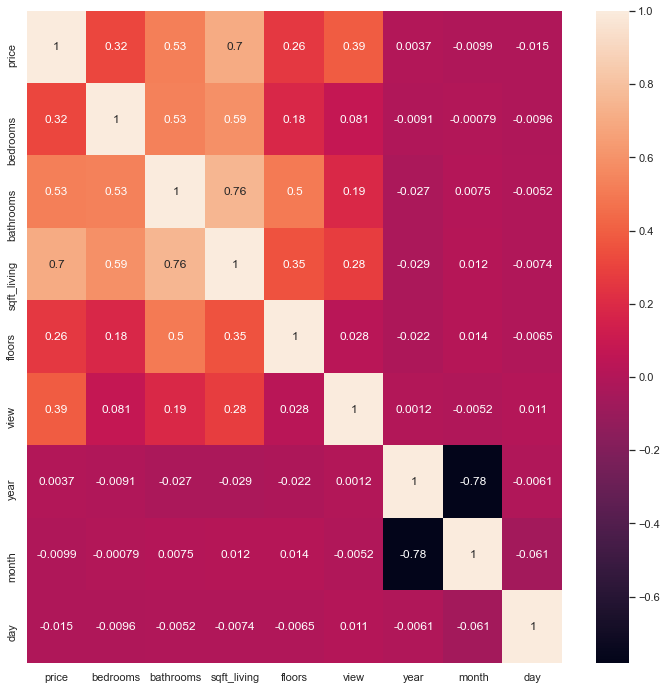

In [61]:
#PLotting a heatmap.
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_model1.corr(), annot=True)

# Modeling: 
Model1
##### We will run a base model:
Sqft_living has the highest correlation with price so this shall be used for our model.



In [62]:
model_price='price ~ sqft_living'
model_price = ols(model_price, df_model1).fit()
model_price_summ = model_price.summary()
model_price_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:29:32   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
model_price_train_preds = model_price.predict(X_train)
model_price_test_preds = model_price.predict(X_test)

In [64]:
print(f"Train R2: {r2_score(y_train, model_price_train_preds)}")
print(f"Test R2: {r2_score(y_test, model_price_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, model_price_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, model_price_test_preds, squared = False)}")

Train R2: 0.49248102591707754
Test R2: 0.4934364209286598
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676197


Interpretation of the above model:

model_price1 shows variation over the base model:
R2 is 0.492 for training and 0.493 for test.
As for our model R2 seems low but RMSE is still high.
We will need to perform more iterations.

In [65]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           2   
2  180000.0         2       1.00          770     10000     1.0           2   
3  604000.0         4       3.00         1960      5000     1.0           2   
4  510000.0         3       2.00         1680      8080     1.0           2   

   view  condition  grade  ...  yr_renovated zipcode      lat     long  \
0     1          3      7  ...           0.0   98178  47.5112 -122.257   
1     1          3      7  ...        1991.0   98125  47.7210 -122.319   
2     1          3      6  ...           NaN   98028  47.7379 -122.233   
3     1          5      7  ...           0.0   98136  47.5208 -122.393   
4     1          3      8  ...           0.0   98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  year  month  day  day_of_week  
0           1340        5650  2014     10   13       Monday  
1           1690        7639  2014     12    9      Tuesday  
2           2720        8062  2015      2   25    Wednesday  
3           1360        5000  2014     12    9      Tuesday  
4           1800        7503  2015      2   18    Wednesday  

[5 rows x 23 columns]

# Multiple Regression: Model 1

Since,we will be iterating the model to train let's create functions to do that work.

In [66]:
#this function will take variables and will give us the OLS results.
def model_base(ind_var, data):
    formula = 'price ~ ' + ' + '.join(ind_var)
    model_fit = ols(formula, data).fit()
    model_fit_summ = model_fit.summary()
    return model_fit,model_fit_summ

In [67]:
# function that does the assessment of the model
def assess(model_base):
    
    train_preds=model_base.predict(X_train)
    test_preds=model_base.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, train_preds)}")
    print(f"Test R2: {r2_score(y_te, test_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, train_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, test_preds, squared = False)}")

    tr_res= y_tr - train_preds
    te_res= y_te - test_preds
    
    plt.scatter(train_preds, tr_res, label = 'Train')
    plt.scatter(test_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'blue', label = '0')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show
    
    f, ax = plt.subplots(figsize=(8, 6)) 
    sns.distplot(te_res, hist=True, label="Actual Price")
    sns.distplot(train_preds, hist=True, label="Predicted Price")
    plt.xlabel("Price Scale")
    plt.legend()
    plt.show()
    return test_preds

In [71]:
# the main function to model and asses the results
def main_model(ind_var,data):
    multi_model, multi_model_summ = model_base(ind_var,data)
    assessment = assess(multi_model)
    #qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)   
    print('        ')
    print('This is the residual plot and qq plot')
    print('        ')
    print(assessment)
    #print(qq)

Train R2: 0.49248102591707754
Test R2: 0.4934364209286598
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676197


/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



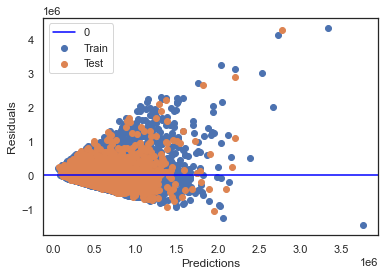

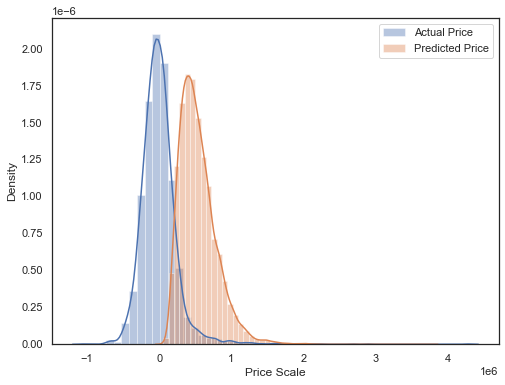

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:32:17   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [72]:
main_model(['sqft_living'],df_model1)

Since, we want to keep our regression model simple we will add one more feature to our data: bedrooms
and see how the model performs.

Train R2: 0.5080571860169638
Test R2: 0.508911993981195
----
Train RMSE: 258782.1395230861
Test RMSE: 252878.73250251313


/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



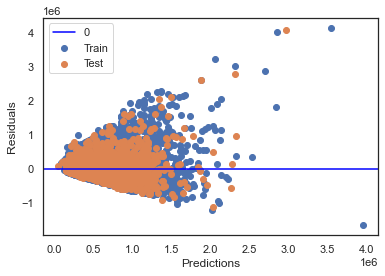

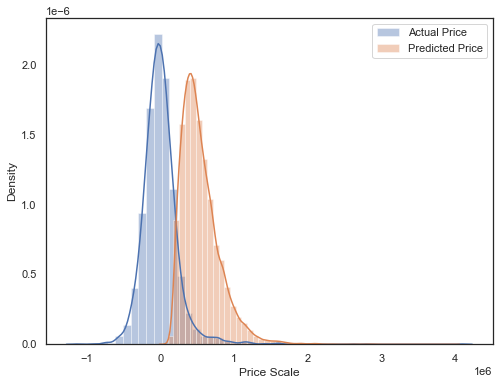

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:32:26   Log-Likelihood:            -2.9973e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [73]:
#testing the model with 2 variables.
main_model(['sqft_living', 'bedrooms'],df_model1)

Adding bedrooms to the model has increased the R2 for training set from 0.492 to 0.508 and from 0.493 to 0.508.
But RMSE value seems to be high so we iterate the model again.

Train R2: 0.5082516969052493
Test R2: 0.5088420909047208
----
Train RMSE: 258730.9741040499
Test RMSE: 252896.72965593002


/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



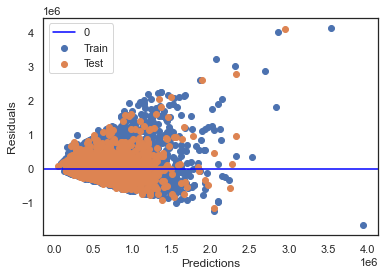

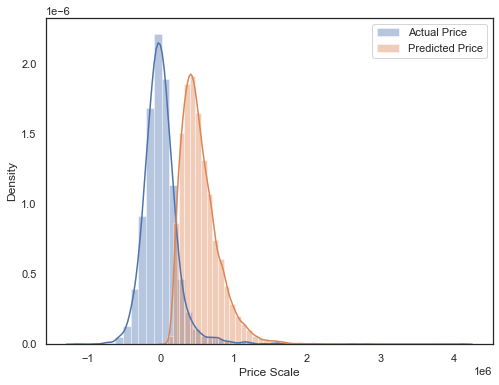

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7443.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:32:34   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [74]:
#let's try adding bathrooms as well
main_model(['sqft_living', 'bedrooms','bathrooms'],df_model1)

Adding bathrooms doesn't seem to make any significant difference in the R2 values,let's look at other features.

Train R2: 0.545457763362997
Test R2: 0.5443239002161739
----
Train RMSE: 248750.5850965511
Test RMSE: 243590.73597005697


/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



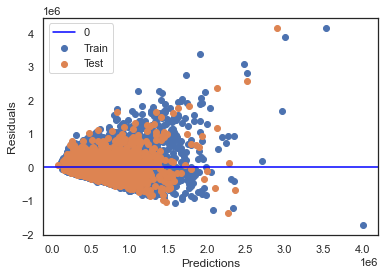

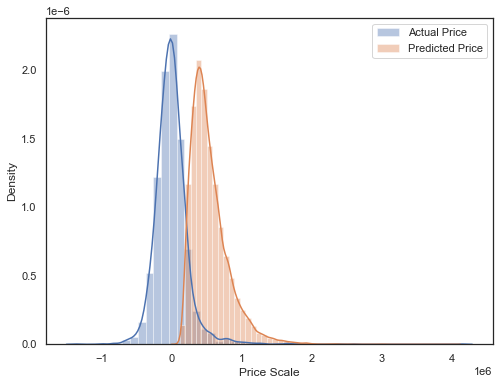

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     6472.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:32:38   Log-Likelihood:            -2.9888e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21592   BIC:                         5.978e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [75]:
#let's try adding floors:
main_model(['sqft_living', 'bedrooms','floors','view'],df_model1)

Adding floors and view has increased the R2 from 0.50 to 0.54 in training data and from 0.50 to 0.544 in test.


### Analyzing the test set results:

* Our model seems to be performing better with an R2 value of 0.54 however RMSE is stll high.
* The residuals for this model seem to be mostly normally distributed. The tails of the qqplot imply that there are some more outliers that could be eliminated in order to improve the accuracy of the model.

### Model2:

We will be looking at other categorical variable like grade, condition, waterfront how they work with price.

In [76]:
#Since for this Model2 we need a new dataframe so we will be uploading and making a new test and training set.
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  yr_renovated zipcode      lat  \
0               0     1          3      7  ...           0.0   98178  47.5112   
1               2     1          3      7  ...        1991.0   98125  47.7210   
2               2     1          3      6  ...           NaN   98028  47.7379   
3               2     1          5      7  ...           0.0   98136  47.5208   
4               2     1          3      8  ...           0.0   98074  47.6168   
...           ...   ...        ...    ...  ...           ...     ...      ...   
21592           2     1          3      8  ...           0.0   98103  47.6993   
21593           2     1          3      8  ...           0.0   98146  47.5107   
21594           2     1          3      7  ...           0.0   98144  47.5944   
21595           0     1          3      8  ...           0.0   98027  47.5345   
21596           2     1          3      7  ...           0.0   98144  47.5941   

          long  sqft_living15  sqft_lot15  year  month  day  day_of_week  
0     -122.257           1340        5650  2014     10   13       Monday  
1     -122.319           1690        7639  2014     12    9      Tuesday  
2     -122.233           2720        8062  2015      2   25    Wednesday  
3     -122.393           1360        5000  2014     12    9      Tuesday  
4     -122.045           1800        7503  2015      2   18    Wednesday  
...        ...            ...         ...   ...    ...  ...          ...  
21592 -122.346           1530        1509  2014      5   21    Wednesday  
21593 -122.362           1830        7200  2015      2   23       Monday  
21594 -122.299           1020        2007  2014      6   23       Monday  
21595 -122.069           1410        1287  2015      1   16       Friday  
21596 -122.299           1020        1357  2014     10   15    Wednesday  

[21597 rows x 23 columns]

In [77]:
X = df.drop('price', axis=1)
y= df['price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
6405          3       2.50         1880      4499     2.0           2     1   
937           3       2.50         2020      6564     1.0           2     1   
19076         5       4.00         4720    493534     2.0           2     1   
15201         2       2.00         1430      3880     1.0           2     1   
13083         3       2.25         2270     32112     1.0           2     1   
...         ...        ...          ...       ...     ...         ...   ...   
11964         3       2.50         2230      5800     2.0           2     1   
21575         4       2.75         2770      3852     2.0           2     1   
5390          4       1.50         1530      9000     1.0           2     1   
860           1       0.75          380     15000     1.0           2     1   
15795         4       2.50         2755     11612     2.0           2     1   

       condition  grade  sqft_above  ... yr_renovated  zipcode      lat  \
6405           3      8        1880  ...          0.0    98029  47.5664   
937            3      7        1310  ...          0.0    98042  47.3545   
19076          5      9        3960  ...          0.0    98027  47.4536   
15201          4      7        1430  ...          0.0    98117  47.6844   
13083          4      8        1740  ...          0.0    98042  47.3451   
...          ...    ...         ...  ...          ...      ...      ...   
11964          3      7        2230  ...          0.0    98065  47.5308   
21575          3      8        2770  ...          NaN    98178  47.5001   
5390           4      6        1530  ...          0.0    98014  47.6492   
860            3      5         380  ...          0.0    98168  47.4810   
15795          3      8        2755  ...          0.0    98019  47.7394   

          long  sqft_living15  sqft_lot15  year  month  day  day_of_week  
6405  -121.999           2130        5114  2015      3    4    Wednesday  
937   -122.158           1710        5151  2014     10    7      Tuesday  
19076 -122.009           2160      219542  2015      1   16       Friday  
15201 -122.392           1430        3880  2015      3   30       Monday  
13083 -122.094           2310       41606  2014     10   14      Tuesday  
...        ...            ...         ...   ...    ...  ...          ...  
11964 -121.847           2230        6088  2014      9   15       Monday  
21575 -122.232           1810        5641  2014     10    2     Thursday  
5390  -121.908           1520        8500  2014      7   21       Monday  
860   -122.323           1170       15000  2014      6   20       Friday  
15795 -121.965           2820       12831  2015      3   25    Wednesday  

[16197 rows x 22 columns]

In [80]:
base_train_mean = y_train.mean()
base_train_mean

541284.4615669568

In [81]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

In [82]:
print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.0001137788699303588
----
Train RMSE: 366333.4407520335
Test RMSE: 370425.86427991075


In [83]:
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6405   529000.0         3       2.50         1880      4499     2.0   
937    253000.0         3       2.50         2020      6564     1.0   
19076  745000.0         5       4.00         4720    493534     2.0   
15201  545000.0         2       2.00         1430      3880     1.0   
13083  390000.0         3       2.25         2270     32112     1.0   
...         ...       ...        ...          ...       ...     ...   
11964  440000.0         3       2.50         2230      5800     2.0   
21575  572000.0         4       2.75         2770      3852     2.0   
5390   299800.0         4       1.50         1530      9000     1.0   
860    245000.0         1       0.75          380     15000     1.0   
15795  545000.0         4       2.50         2755     11612     2.0   

       waterfront  view  condition  grade  ...  yr_renovated zipcode      lat  \
6405            2     1          3      8  ...           0.0   98029  47.5664   
937             2     1          3      7  ...           0.0   98042  47.3545   
19076           2     1          5      9  ...           0.0   98027  47.4536   
15201           2     1          4      7  ...           0.0   98117  47.6844   
13083           2     1          4      8  ...           0.0   98042  47.3451   
...           ...   ...        ...    ...  ...           ...     ...      ...   
11964           2     1          3      7  ...           0.0   98065  47.5308   
21575           2     1          3      8  ...           NaN   98178  47.5001   
5390            2     1          4      6  ...           0.0   98014  47.6492   
860             2     1          3      5  ...           0.0   98168  47.4810   
15795           2     1          3      8  ...           0.0   98019  47.7394   

          long  sqft_living15  sqft_lot15  year  month  day  day_of_week  
6405  -121.999           2130        5114  2015      3    4    Wednesday  
937   -122.158           1710        5151  2014     10    7      Tuesday  
19076 -122.009           2160      219542  2015      1   16       Friday  
15201 -122.392           1430        3880  2015      3   30       Monday  
13083 -122.094           2310       41606  2014     10   14      Tuesday  
...        ...            ...         ...   ...    ...  ...          ...  
11964 -121.847           2230        6088  2014      9   15       Monday  
21575 -122.232           1810        5641  2014     10    2     Thursday  
5390  -121.908           1520        8500  2014      7   21       Monday  
860   -122.323           1170       15000  2014      6   20       Friday  
15795 -121.965           2820       12831  2015      3   25    Wednesday  

[16197 rows x 23 columns]

In [84]:
df_model2 =df_train.drop(['sqft_living','lat' ,'long','sqft_basement'],axis=1)

In [85]:
df_model2.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.671702
sqft_above       0.601355
sqft_living15    0.591150
bathrooms        0.529906
view             0.400362
bedrooms         0.320253
floors           0.257826
yr_renovated     0.129071
sqft_lot         0.089019
sqft_lot15       0.080682
yr_built         0.046835
condition        0.046139
year             0.008310
day             -0.009128
month           -0.016383
waterfront      -0.023119
zipcode         -0.047865
Name: price, dtype: float64

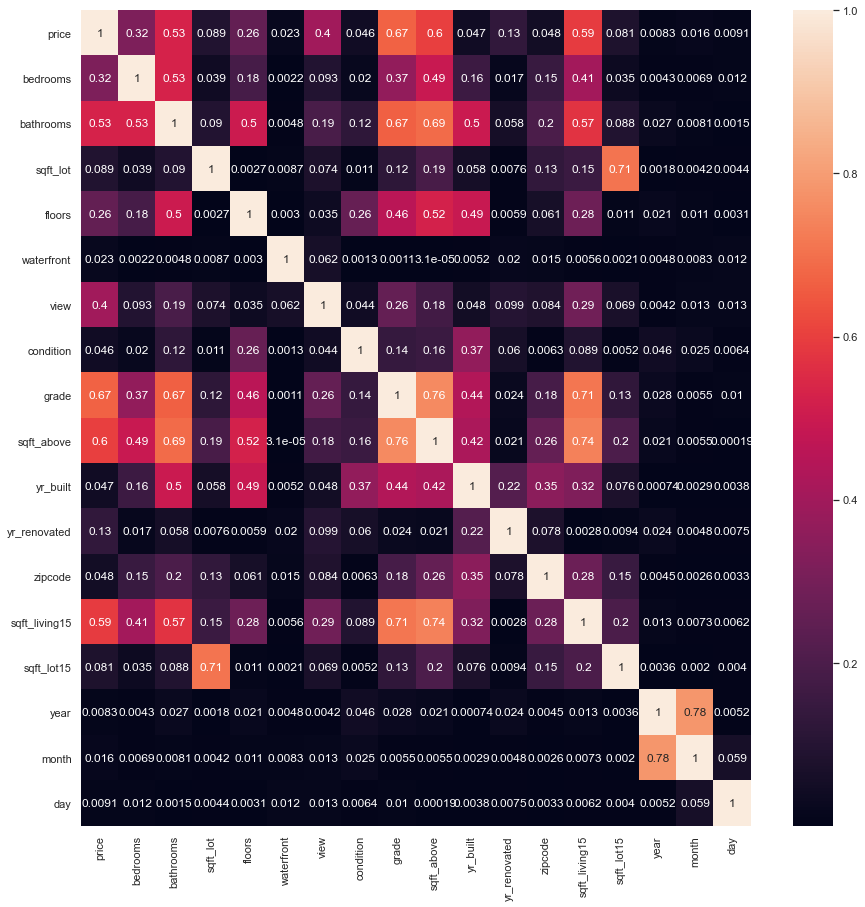

In [87]:
plt.figure(figsize = (15,15))
sns.set(style = "white")
sns.heatmap(df_model2.corr().abs(), annot = True)
plt.savefig("HeatMap_Model2")

HeatMap Analysis:
* Grade of the house has the highest correlation with price.
* Waterfront and zipcode seems to have a negative coorelation.

Train R2: 0.615633627131986
Test R2: 0.5955821421243408
----
Train RMSE: 227116.79857885407
Test RMSE: 235554.69220834842


/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/Ravinder/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



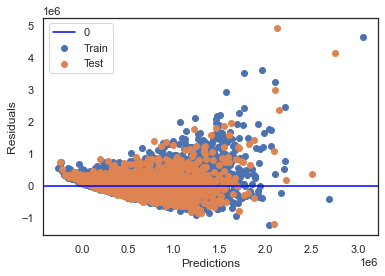

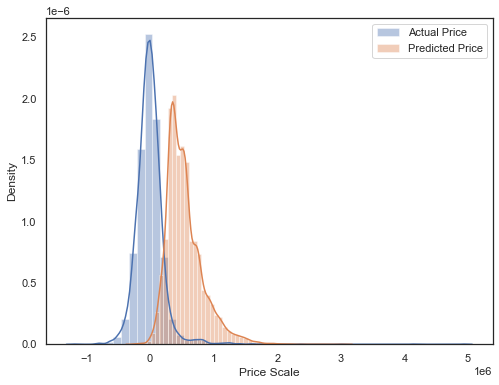

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     4322.
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:33:19   Log-Likelihood:            -2.2274e+05
No. Observations:               16197   AIC:                         4.455e+05
Df Residuals:                   16190   BIC:                         4.456e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [88]:
main_model(['grade','sqft_above','view','waterfront','bathrooms','yr_built'],df_model2)

### Analyzing model2 Performance:
* Our model seems to be performing better with an R2 value of 0.61 however RMSE is stll high.
* Model shows multicollinearity and needs to be improved on.
* Histogram for price shows someoverlap between actual and predicted values.
* The residuals for this model seem to be mostly normally distributed. The tails of the qqplot imply that there are some more outliers that could be eliminated in order to improve the accuracy of the model.

### Regression results:
The features we found to be most important in predicting the price of a house were:

* Grade of the house.
* sqft_above.
* view
* waterfront
* bathrooms
* yr_built

However, our model is not perfect. It's coefficient of determination -R2 is just around 0.61. 
Since we are working with real world data that is inherently noisy, this is not a bad value. However, this still means that more than 39% of the variance in housing prices cannot be explained by the selected input features. 


### Conclusion
what have we learned?
Grade of a house does show an increase in price.
Factors like the number of bedrooms, bathrooms, square foot living space,do have an effect on the price.
Bigger is better, for the most part. Square foot living has the highest correlation with price. While aspects like number of bedrooms also showed a steady increasing trend, the number of bathrooms and floors were a little more inconsistent. 